<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [31]:
using LinearAlgebra
using Documenter
using Markdown  
include("Pas_De_Cauchy.jl")
# @doc Pas_De_Cauchy

Pas_De_Cauchy

2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [32]:
using Test

## ajouter les fonctions de test
include("../test/tester_pas_de_Cauchy.jl")
include("../src/Pas_De_Cauchy.jl")

@testset "Test pas de Cauchy" begin
	tester_pas_de_Cauchy(Pas_De_Cauchy)
end;

Test Summary:      | Pass  Total  Time
Test pas de Cauchy |   10     10  1.8s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [33]:
include("Regions_De_Confiance.jl")
# @doc Regions_De_Confiance

Regions_De_Confiance

4. Vérifier que les tests ci-dessous passent.

In [41]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

Test Summary:       | Pass  Total  Time
Test rc avec cauchy |   15     15  1.8s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

## Réponses

1. Comme $f_1$ est quadratique, elle est égale à son développement de taylor à l'ordre 2.   
    Pour $x_{011}\;$, Newton converge en 1 itération et RC-Pas de Cauchy en 26 itérations.  
    Pour $x_{012}\;$, Newton converge en 1 itération et RC-Pas de Cauchy en 28 itérations.  
    Ainsi, Newton est plus performant que RC-Pas de Cauchy sur ces exemples de test.

2.

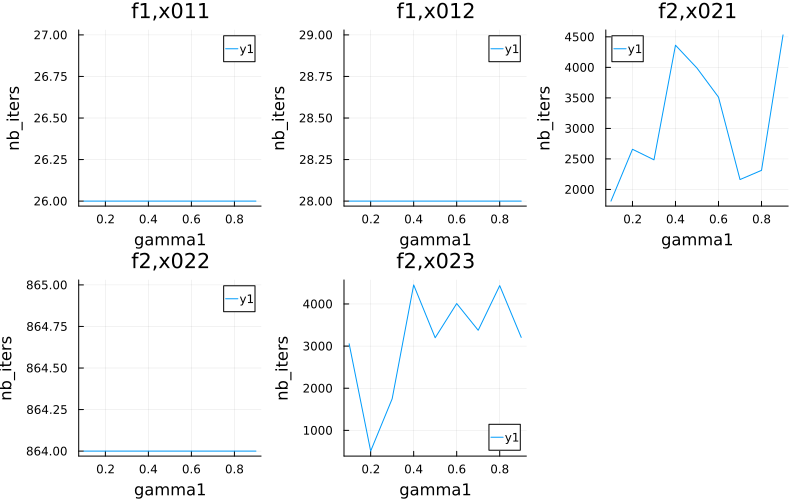

In [35]:
"""Code à lancer pour la question 2"""

#using Pkg
#Pkg.add("Plots")
using Plots

# initialisation des variables de l'algorithme
gamma1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0 = 2


## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")


pts = [x011, x012, x021, x022, x023]
nb_pts = length(pts)
n =length(gamma1)

iters = []
affichage = []

for j in 1:nb_pts
    if j <= 2
        f = fct1
        c = contrainte1
        g = grad_fct1
        h = hess_fct1
    else
        f = fct2
        c = contrainte2
        g = grad_fct2
        h = hess_fct2
    end
    for i in 1:n
        ~, ~, ~, nb_iters = Regions_De_Confiance("cauchy",f,g,h,pts[j],[deltaMax,gamma1[i],gamma2,eta1,eta2,delta0,maxits,Tol_abs,Tol_rel,epsilon])
        push!(iters, nb_iters)
    end
    push!(affichage,plot(gamma1,iters))
    iters = []
end



plot(plot(affichage[1], xlabel= "gamma1", ylabel = "nb_iters", title = "f1,x011"),
     plot(affichage[2], xlabel= "gamma1", ylabel = "nb_iters", title = "f1,x012"),
     plot(affichage[3], xlabel= "gamma1", ylabel = "nb_iters", title = "f2,x021"),
     plot(affichage[4], xlabel= "gamma1", ylabel = "nb_iters", title = "f2,x022"),
     plot(affichage[5], xlabel= "gamma1", ylabel = "nb_iters", title = "f2,x023"),size = (800,500)
     )



On remarque que $\gamma_1$ a une influence sur les performances de $f_2$ avec une valeur optimale en 0.2 pour $x_{023}$ et 0.1 pour $x_{021}$. $\gamma_1$ n'a pas d'influence sur les performances de $f_1$  
On peut aussi jouer sur $\eta_1$:

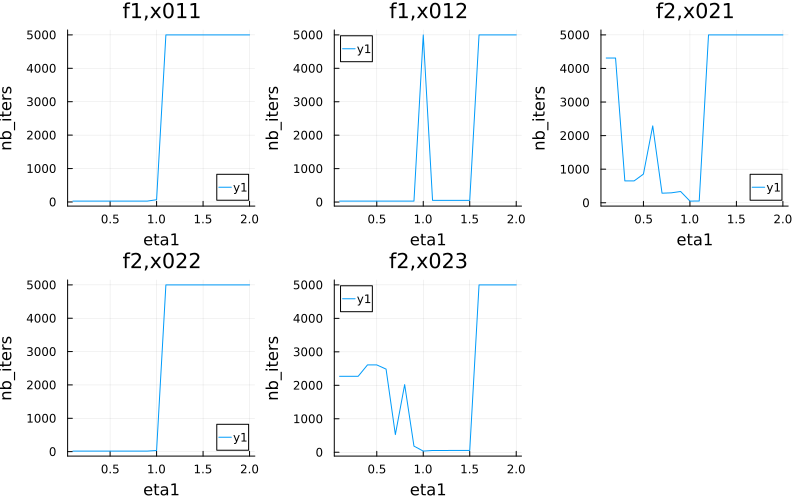

In [36]:
"""Code à lancer pour la question 2"""

#using Pkg
#Pkg.add("Plots")
using Plots

# initialisation des variables de l'algorithme
gamma1 = 0.5
gamma2 = 2.00
eta1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
eta2 = 3
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0 = 2


## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")


pts = [x011, x012, x021, x022, x023]
nb_pts = length(pts)
n =length(eta1)

iters = []
affichage = []

for j in 1:nb_pts
    if j <= 2
        f = fct1
        c = contrainte1
        g = grad_fct1
        h = hess_fct1
    else
        f = fct2
        c = contrainte2
        g = grad_fct2
        h = hess_fct2
    end
    for i in 1:n
        ~, ~, ~, nb_iters = Regions_De_Confiance("cauchy",f,g,h,pts[j],[deltaMax,gamma1,gamma2,eta1[i],eta2,delta0,maxits,Tol_abs,Tol_rel,epsilon])
        push!(iters, nb_iters)
    end
    push!(affichage,plot(eta1,iters))
    iters = []
end



plot(plot(affichage[1], xlabel= "eta1", ylabel = "nb_iters", title = "f1,x011"),
     plot(affichage[2], xlabel= "eta1", ylabel = "nb_iters", title = "f1,x012"),
     plot(affichage[3], xlabel= "eta1", ylabel = "nb_iters", title = "f2,x021"),
     plot(affichage[4], xlabel= "eta1", ylabel = "nb_iters", title = "f2,x022"),
     plot(affichage[5], xlabel= "eta1", ylabel = "nb_iters", title = "f2,x023"),size = (800,500)
     )



On remarque qu'au moins à partir de $\eta_1 = 1.5$ le nombre d'itérations explose pour les deux fonctions.  
Les valeurs optimales de $\eta_1$ pour $f_1$ sont comprises entre 0.1 et 0.9  
La valeur optimale de $\eta_1$ pour $f_2$ est en 0.9

# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [37]:
include("Gradient_Conjugue_Tronque.jl")
# @doc Gradient_Conjugue_Tronque

Gradient_Conjugue_Tronque

2. Vérifier que les tests ci-dessous passent.

In [38]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = false

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

Test Summary: | Pass  Total  Time
Test gct      |    9      9  3.2s


3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [40]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

Test Summary:              | Pass  Total  Time
Test rc avec cauchy et gct |   30     30  3.1s


## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 
    1. Que remarquez vous ?
    2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.

3. Quels sont les avantages et inconvénients des deux approches ?

1.1)  En imposant la sortie de l'algorithme en 1 itération, on obtient :  
| Cauchy | $x_{011}$ | $x_{012}$ | $x_{021}$ | $x_{022}$ | $x_{0223}$ | 
| :-: | :-: | :-: |:-: | :-: | :-: |
| $f_1$| 0.4675767918088737 | 106.01194691455754 | X | X | X |
| $f_2$|X|X|4.567782114503026|408882.1244193037|0.95312500000552|  

Et :

| GCT | $x_{011}$ | $x_{012}$ | $x_{021}$ | $x_{022}$ | $x_{0223}$ | 
| :-: | :-: | :-: |:-: | :-: | :-: |
| $f_1$| 2.0214560696288428e-30 | 106.01194691455754 | X | X | X |
| $f_2$|X|X|4.731884325266613|408882.1244193037|1.002500000001|

On remarque que globalement GCT et Cauchy ont des perfmances très proches sauf pour $x_{011}$ où la décroissance obtenue avec GCT est bien meilleure que celle avec Cauchy.  
Pour les cas avec $f_2$, on remarque que Cauchy est légèrement meilleur que GCT.

1.2) Dans le cas général, on obtient :  
| Cauchy | $x_{011}$ | $x_{012}$ | $x_{021}$ | $x_{022}$ | $x_{0223}$ | 
| :-: | :-: | :-: |:-: | :-: | :-: |
| $f_1$| 9.090411079109608e-9 | 6.0401046516733e-9 | X | X | X |
| $f_2$|X|X|5.768693455998473e-6|1.4697922911344958e-5|3.935418178353333e-6|  

Et :

| GCT | $x_{011}$ | $x_{012}$ | $x_{021}$ | $x_{022}$ | $x_{0223}$ | 
| :-: | :-: | :-: |:-: | :-: | :-: |
| $f_1$| 2.0214560696288428e-30 | 0.0 | X | X | X |
| $f_2$|X|X|1.0611413038132374e-13|2.4053014026923312e-11|3.1813581453548166e-24|

Dans le cas général, on remarque que pour tous les cas, la décroissance obtenue avec GCT est au moins $10^6$ meilleure que celle obtenue avec Cauchy  

2. Observer les résultats en imposant la sortie en un faible nombre d'itérations permet de voir quel algorithme converge le plus vite vers la solution alors que dans l'autre cas  
où on limite le nombre d'itérations avec un nombre maximal assez grand (1000 dans les tests) on peut voir quel algorithme permet d'obtenir la meilleure solution d'un point de vue numérique.